### Handwritten Digit Recognizer Challenge.

#### Import Libraries

In [8]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

#### Create a transformation

In this task, you will create a transformation that will be applied to the dataset. You will download the datasets in the next task. To create a transformation, you will use the following functions from torchvision.transforms:

Compose(): This method will be used to create a transformation.
ToTensor(): This takes the image’s pixel values and scales them from 0–255 to 0–1.
Normalize(): This method accepts the two parameters of mean and standard deviation and normalizes the tensor with these values. You can use 0.5 for both of these parameters.


In [9]:
normalize = transforms.Normalize(mean=[0.5], std=[0.5])
tensor = transforms.ToTensor()
transformation = transforms.Compose([tensor, normalize])

#### Download and Load Datasets

In [10]:
training_dataset = datasets.MNIST('.', download=True, train=True, transform=transformation)
testing_dataset = datasets.MNIST('.', download=True, train=False, transform=transformation)

train_data = torch.utils.data.DataLoader(training_dataset, batch_size=64, shuffle=True)
test_data = torch.utils.data.DataLoader(testing_dataset, batch_size=64, shuffle=True)

#### Visualize the images
In this task, you will use the datasets created in the previous task and visualize the images using the following steps:

To get the images from the datasets, use the iter() method to iterate over the training data.

Use the imshow() method from matplotlib.pyplot to plot the images.

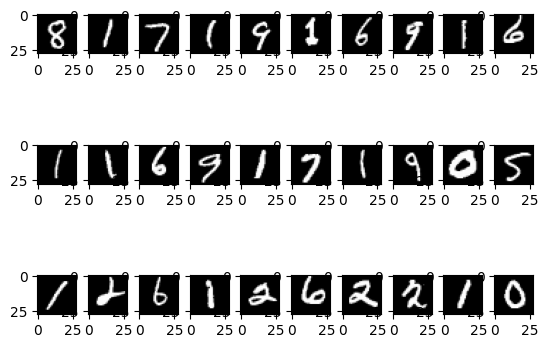

In [12]:
images, labels = next(iter(train_data))
for i in range(1, 31):
    plt.subplot(3, 10, i)
    plt.subplots_adjust(wspace=0.3)
    plt.imshow(images[i].numpy().squeeze(), cmap='gray')

#### Decide the Number of Layers and Their Sizes

In this task, you’ll calculate the model’s number of input, hidden, and output layers. Use the following steps to calculate the size of each layer:

To get the size for the input layer, you need to evaluate the size of the tensor. To get the tensor size, check the shape of any image from the images variable you’ve created in the previous task.
Note: Calling the images.shape returns [64, 1, 28, 28]. This shows that there are 64 images of 28*28. Therefore, the input layer size will be 784.

For this project, you can go with two hidden layers and set their sizes as 64 and 32, respectively.
Note: You can choose to have more hidden layers with other sizes.

In [15]:
input_layer = 784
hidden_layer1 = 64
hidden_layer2 = 32
output_layer = 10

#### Build a Model

In this task, you’ll create the model to train. To create this model, you can use the Sequential() method from the torch.nn module, which wraps the layers into a network model. You will use the following methods from the torch.nn module:

nn.Linear(): Use this method to map the input layer to the first hidden layer, the first hidden layer to the second hidden layer, and the second hidden layer to the output layer. It takes two integer values representing the sizes of the two layers, and connects them via a linear transformation.

nn.ReLU(): Use this method as the non-linear activation function after applying each nn.Linear map, except for the last one.

In [16]:
model = nn.Sequential(nn.Linear(input_layer, hidden_layer1),
nn.ReLU(),
nn.Linear(hidden_layer1,hidden_layer2),
nn.ReLU(),
nn.Linear(hidden_layer2, output_layer))

#### Calculate Cross-Entropy Loss

In this task, you will calculate the cross-entropy loss. This loss function is used to determine the accuracy of your machine learning or deep learning models by defining the difference between the predictions by the model and the desired outcomes. The greater the disparity between the two, the greater the loss.

Note: To minimize the loss, the cross-entropy loss is used to adjust the model weights during training using backpropagation.

In this task, you’ll calculate the cross-entropy loss using the untrained model you created in the previous task.

Note: The function-call sequence will remain the same for the trained model as well.

In [17]:
images = images.view(images.shape[0], -1)
outputs = model(images)
loss_function = nn.CrossEntropyLoss()
loss = loss_function(outputs, labels)

#### Obtain the Stochastic Gradient Descent Optimizer

In this task, you’ll obtain the stochastic gradient descent optimizer for the model you created in the previous section. This gradient descent will optimize the weights with each iteration of the model. You’ll use the SGD() method from torch.optim to create the gradient descent. This method will accept the following parameters:

Parameters from the model.
Learning rate for the stochastic gradient descent.

In [18]:
gradient_descent = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

#### Train the Model

In this task, you’ll train the model for a certain number of epochs. The training will contain the following steps:

Call the zero_grad() function of the gradient_descent variable to reset the weights to zero after iteration. This is to avoid weight-accumulation.

Calculate the cross-entropy loss.

Update the weights using backpropagation.

Optimize the weights using gradient descent.

In [20]:
epochs = 20
for epoch in range(epochs):
    running_loss = 0
    for images, labels in train_data:
        images = images.view(images.shape[0], -1)

        # Feed forward
        gradient_descent.zero_grad()
        loss = loss_function(model(images), labels)

        # Backward propagation
        loss.backward()

        # Optimize the weights
        gradient_descent.step()
        running_loss += loss.item() + images.size(0)
    epoch_loss = running_loss/len(train_data)
    print("Iteration : ", epoch+1, end = "\t")
    print("Loss: ", epoch_loss)

Iteration :  1	Loss:  64.41503580630238
Iteration :  2	Loss:  64.16156523168158
Iteration :  3	Loss:  64.11432650156105
Iteration :  4	Loss:  64.08978163340944
Iteration :  5	Loss:  64.07148936672061
Iteration :  6	Loss:  64.05714212472328
Iteration :  7	Loss:  64.04961873091031
Iteration :  8	Loss:  64.0416614001593
Iteration :  9	Loss:  64.03707659264904
Iteration :  10	Loss:  64.03057181373931
Iteration :  11	Loss:  64.0267469165956
Iteration :  12	Loss:  64.02457903892419
Iteration :  13	Loss:  64.01742940889805
Iteration :  14	Loss:  64.01376141270883
Iteration :  15	Loss:  64.01212758195774
Iteration :  16	Loss:  64.00970338054869
Iteration :  17	Loss:  64.00751685946658
Iteration :  18	Loss:  64.00481312450613
Iteration :  19	Loss:  64.00073589355651
Iteration :  20	Loss:  63.99997253923349


#### Get the Predicted Label

In this task, you’ll create a new method that accepts an image and uses the trained model to return the predicted label. This method will do the following:

Reshape the image according to the training data.
Use the model to get the predicted label.
Note: The model will return the prediction scores for each output node.

Return the node with the maximum prediction score.
After completing the method, test the method by evaluating a single image from the dataset.

In [21]:
def get_predicted_label(image):
    image = image.view(1, 28*28)
    with torch.no_grad():
        prediction_score = model(image)
    return np.argmax(prediction_score)

In [22]:
images, labels = next(iter(test_data))
print("Predicted Label: ", get_predicted_label(images[0]))
print("Actual Label: ", labels.numpy()[0])

Predicted Label:  tensor(1)
Actual Label:  1


#### Test the model

In this task, you’ll use the trained model to predict the images from the test_data. To test the model, you’ll iterate through all the images from the testing data and pass them to the method you created in the previous task. Also, compute and print the accuracy percentage.

In [29]:
totalCount = 0
accurateCount = 0
for images, labels in test_data:
    for i in range(len(labels)):
        predictedLabel = get_predicted_label(images[i])
        actualLabel = labels.numpy()[i]
        print("Predicted Label: ", predictedLabel, " / Actual Label: ", actualLabel)
        if(predictedLabel == actualLabel):
            accurateCount += 1
    totalCount += len(labels)
print("Total images tested: : ", totalCount)
print("Accurate predictions: ", accurateCount)
print("Accuracy percentage: ", ((accurateCount/totalCount)*100), "%")

Predicted Label:  tensor(9)  / Actual Label:  9
Predicted Label:  tensor(0)  / Actual Label:  0
Predicted Label:  tensor(4)  / Actual Label:  4
Predicted Label:  tensor(0)  / Actual Label:  2
Predicted Label:  tensor(6)  / Actual Label:  6
Predicted Label:  tensor(4)  / Actual Label:  4
Predicted Label:  tensor(5)  / Actual Label:  5
Predicted Label:  tensor(6)  / Actual Label:  6
Predicted Label:  tensor(2)  / Actual Label:  2
Predicted Label:  tensor(2)  / Actual Label:  2
Predicted Label:  tensor(6)  / Actual Label:  6
Predicted Label:  tensor(0)  / Actual Label:  0
Predicted Label:  tensor(8)  / Actual Label:  8
Predicted Label:  tensor(3)  / Actual Label:  3
Predicted Label:  tensor(9)  / Actual Label:  9
Predicted Label:  tensor(9)  / Actual Label:  9
Predicted Label:  tensor(9)  / Actual Label:  9
Predicted Label:  tensor(8)  / Actual Label:  8
Predicted Label:  tensor(7)  / Actual Label:  7
Predicted Label:  tensor(4)  / Actual Label:  4
Predicted Label:  tensor(9)  / Actual La